In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-dataset/Vrinda Store Data Analysis (1).xlsx
/kaggle/input/vinod-sales-data/Vrinda Store Data Analysis (1).xlsx
/kaggle/input/store-sales-dataset/Vrinda Store Data Analysis (1).xlsx


In [2]:
df=pd.read_excel('/kaggle/input/vinod-sales-data/Vrinda Store Data Analysis (1).xlsx')
df

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,11234,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376.0,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,23244,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449.0,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,21343,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453.0,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,454564,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,NaN,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,454333,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544.0,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,31043,405-4724097-1016369,4724097,M,60,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565.0,PUNE,MAHARASHTRA,412307,IN,False
31043,31044,405-4724097-1016369,4724097,M,34,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,S,One,INR,939.0,BENGALURU,KARNATAKA,560061,IN,False
31044,31045,408-3572295-5992330,3572295,M,29,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,L,One,INR,1115.0,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,31046,405-1423498-9705162,1423498,M,46,2022-01-06,Delivered,Amazon,JNE3568-KR-M,kurta,M,One,INR,399.0,DHULE,MAHARASHTRA,424006,IN,False


In [3]:
df.head()

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,11234,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376.0,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,23244,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449.0,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,21343,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453.0,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,454564,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,NaN,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,454333,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544.0,GURUGRAM,HARYANA,122001,IN,False


In [4]:
df.shape

(31047, 19)

In [5]:
df.columns

Index(['index', 'ORDERID', 'Cust ID', 'GENDER', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=31047, step=1)

In [7]:
df.dtypes

index                        int64
ORDERID                     object
Cust ID                      int64
GENDER                      object
Age                          int64
Date                datetime64[ns]
Status                      object
Channel                     object
SKU                         object
Category                    object
Size                        object
Qty                         object
currency                    object
Amount                     float64
ship-city                   object
ship-state                  object
ship-postal-code             int64
ship-country                object
B2B                           bool
dtype: object

**Checking for the Unique values in the dataframe**

In [8]:
df.nunique()

index               31047
ORDERID             28471
Cust ID             28438
GENDER                  4
Age                    61
Date                   36
Status                  4
Channel                 7
SKU                  5287
Category                8
Size                   11
Qty                     7
currency                1
Amount                769
ship-city            2603
ship-state             50
ship-postal-code     4958
ship-country            1
B2B                     2
dtype: int64

In [9]:
d=df.iloc[:,7].values
d

array(['Myntra', 'Ajio', 'Myntra', ..., 'Amazon', 'Amazon', 'Flipkart'],
      dtype=object)

In [10]:
da=pd.DataFrame(d,columns=['medium'])
da

,medium
0,Myntra
1,Ajio
2,Myntra
3,Amazon
4,Myntra
...,...
31042,Flipkart
31043,Myntra
31044,Amazon
31045,Amazon


In [11]:
df=pd.concat([df,da],axis=1)
df

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
0,1,171-1029312-3038738,11234,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376.0,MOHALI,PUNJAB,140301,IN,False,Myntra
1,2,405-2183842-2225946,23244,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449.0,GURUGRAM,HARYANA,122002,IN,False,Ajio
2,3,171-1641533-8921966,21343,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453.0,KOLKATA,WEST BENGAL,700029,IN,False,Myntra
3,4,404-7490807-6300351,454564,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,NaN,THANJAVUR,TAMIL NADU,613007,IN,False,Amazon
4,5,403-9293516-4577154,454333,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544.0,GURUGRAM,HARYANA,122001,IN,False,Myntra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,31043,405-4724097-1016369,4724097,M,60,2022-01-06,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565.0,PUNE,MAHARASHTRA,412307,IN,False,Flipkart
31043,31044,405-4724097-1016369,4724097,M,34,2022-01-06,Delivered,Myntra,J0010-LCD-S,Set,S,One,INR,939.0,BENGALURU,KARNATAKA,560061,IN,False,Myntra
31044,31045,408-3572295-5992330,3572295,M,29,2022-01-06,Delivered,Amazon,SET398-KR-PP-L,Set,L,One,INR,1115.0,PITHORAGARH,UTTARAKHAND,262501,IN,False,Amazon
31045,31046,405-1423498-9705162,1423498,M,46,2022-01-06,Delivered,Amazon,JNE3568-KR-M,kurta,M,One,INR,399.0,DHULE,MAHARASHTRA,424006,IN,False,Amazon


In [12]:
df['Qty'].nunique()

7

In [13]:
df.Qty

0          1
1          1
2          1
3          1
4          1
        ... 
31042    One
31043    One
31044    One
31045    One
31046    One
Name: Qty, Length: 31047, dtype: object

In [14]:
df.Qty.value_counts()

1      30870
2        114
3         19
Two       16
One       13
4          6
5          1
Name: Qty, dtype: int64

In [15]:
df.Qty[2]

1

**Replacing all the String with numbers**

In [16]:
df['Qty']=df['Qty'].replace(['One','Two'],[1,2])

In [17]:
df.Qty.value_counts()

1.0    30883
2.0      130
3.0       19
4.0        6
5.0        1
Name: Qty, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   ORDERID           31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   GENDER            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31039 non-null  float64       
 12  currency          31047 non-null  object        
 13  Amount            31041 non-null  float64       
 14  ship-city         3104

**Checking for the null values**

In [19]:
df.isna().head()

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isna().sum()

index               0
ORDERID             0
Cust ID             0
GENDER              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 8
currency            0
Amount              6
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
medium              0
dtype: int64

**Visualizing the null values using the heatmap**

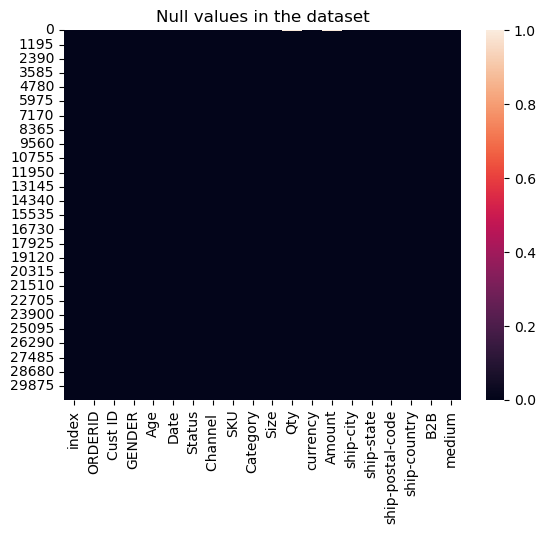

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isna())
plt.title("Null values in the dataset")
plt.show()

**Checking the dtypes of each columns**

In [22]:
df.dtypes

index                        int64
ORDERID                     object
Cust ID                      int64
GENDER                      object
Age                          int64
Date                datetime64[ns]
Status                      object
Channel                     object
SKU                         object
Category                    object
Size                        object
Qty                        float64
currency                    object
Amount                     float64
ship-city                   object
ship-state                  object
ship-postal-code             int64
ship-country                object
B2B                           bool
medium                      object
dtype: object

In [23]:
df['GENDER'].value_counts()

Women    21479
Men       9452
W           74
M           42
Name: GENDER, dtype: int64

In [24]:
df['GENDER']=df['GENDER'].replace(['Women','Men','W'],['F','M','F'])
df['GENDER'].value_counts()

F    21553
M     9494
Name: GENDER, dtype: int64

In [25]:
df['GENDER'].value_counts()

F    21553
M     9494
Name: GENDER, dtype: int64

**Fill all the null values**

In [26]:
import math
df['Qty'].fillna(math.floor(df.Qty.mean()),inplace=True)
df['Amount'].fillna(math.floor(df.Amount.mean()),inplace=True)
df.head()

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
0,1,171-1029312-3038738,11234,F,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1.0,INR,376.0,MOHALI,PUNJAB,140301,IN,False,Myntra
1,2,405-2183842-2225946,23244,F,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1.0,INR,1449.0,GURUGRAM,HARYANA,122002,IN,False,Ajio
2,3,171-1641533-8921966,21343,F,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1.0,INR,453.0,KOLKATA,WEST BENGAL,700029,IN,False,Myntra
3,4,404-7490807-6300351,454564,F,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1.0,INR,682.0,THANJAVUR,TAMIL NADU,613007,IN,False,Amazon
4,5,403-9293516-4577154,454333,F,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1.0,INR,544.0,GURUGRAM,HARYANA,122001,IN,False,Myntra


In [27]:
df.isna().sum()

index               0
ORDERID             0
Cust ID             0
GENDER              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
medium              0
dtype: int64

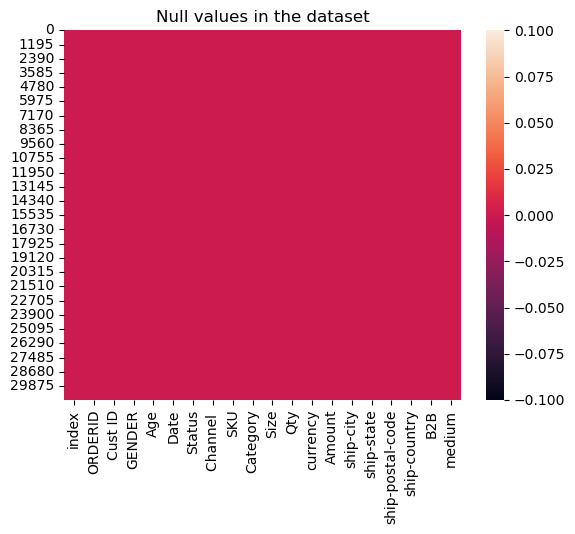

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isna())
plt.title("Null values in the dataset")
plt.show()

In [29]:
df.columns

Index(['index', 'ORDERID', 'Cust ID', 'GENDER', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'medium'],
      dtype='object')

**Check if any products are shipped from Hyderabad?**

In [30]:
df[df['ship-city']=='HYDERABAD'].head()

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
14,15,407-0442660-2736366,442660,F,52,2022-12-04,Delivered,Amazon,SET333-KR-DPT-M,Set,M,1.0,INR,967.0,HYDERABAD,TELANGANA,500098,IN,False,Amazon
24,25,402-0398999-0011565,398999,F,37,2022-12-04,Delivered,Amazon,SET273-KR-NP-M,Set,M,1.0,INR,612.0,HYDERABAD,TELANGANA,500060,IN,False,Amazon
50,51,405-4213846-6141157,4213846,F,27,2022-12-04,Delivered,Amazon,J0003-SET-M,Set,M,1.0,INR,664.0,HYDERABAD,TELANGANA,500039,IN,False,Amazon
55,56,408-4675134-5301129,4675134,F,58,2022-12-04,Delivered,Meesho,SET209-KR-PP-XXL,Set,XXL,1.0,INR,507.0,HYDERABAD,TELANGANA,500008,IN,False,Meesho
90,91,403-8575376-3341124,8575376,F,32,2022-12-04,Delivered,Flipkart,SET253-KR-NP-L,Set,L,1.0,INR,737.0,HYDERABAD,TELANGANA,500020,IN,False,Flipkart


**How many products are delivered from the city Hyderabad?**

In [31]:
df[df['ship-city']=='HYDERABAD']

,index,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
14,15,407-0442660-2736366,442660,F,52,2022-12-04,Delivered,Amazon,SET333-KR-DPT-M,Set,M,1.0,INR,967.0,HYDERABAD,TELANGANA,500098,IN,False,Amazon
24,25,402-0398999-0011565,398999,F,37,2022-12-04,Delivered,Amazon,SET273-KR-NP-M,Set,M,1.0,INR,612.0,HYDERABAD,TELANGANA,500060,IN,False,Amazon
50,51,405-4213846-6141157,4213846,F,27,2022-12-04,Delivered,Amazon,J0003-SET-M,Set,M,1.0,INR,664.0,HYDERABAD,TELANGANA,500039,IN,False,Amazon
55,56,408-4675134-5301129,4675134,F,58,2022-12-04,Delivered,Meesho,SET209-KR-PP-XXL,Set,XXL,1.0,INR,507.0,HYDERABAD,TELANGANA,500008,IN,False,Meesho
90,91,403-8575376-3341124,8575376,F,32,2022-12-04,Delivered,Flipkart,SET253-KR-NP-L,Set,L,1.0,INR,737.0,HYDERABAD,TELANGANA,500020,IN,False,Flipkart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30947,30948,171-8033179-4719562,8033179,F,45,2022-01-06,Delivered,Ajio,JNE3461-KR-M,kurta,M,1.0,INR,352.0,HYDERABAD,TELANGANA,500044,IN,False,Ajio
30997,30998,408-9579839-6574765,9579839,M,39,2022-01-06,Delivered,Myntra,SET363-KR-NP-M,Set,M,1.0,INR,1338.0,HYDERABAD,TELANGANA,500048,IN,False,Myntra
31024,31025,404-9228208-9407529,9228208,M,55,2022-01-06,Delivered,Flipkart,SAR012,Saree,Free,1.0,INR,399.0,HYDERABAD,TELANGANA,502032,IN,False,Flipkart
31026,31027,404-7444867-4101107,7444867,M,42,2022-01-06,Delivered,Myntra,SAR020,Saree,Free,1.0,INR,721.0,HYDERABAD,TELANGANA,502319,IN,False,Myntra


**To which gender the products of hyderabad has been shipped?**

In [32]:
hyd_dat=df[df['ship-city']=='HYDERABAD']
hyd_dat.shape

(1785, 20)

[]

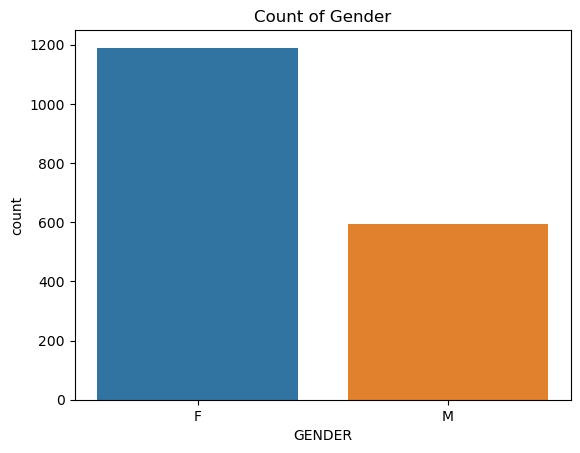

In [33]:
sns.countplot(x='GENDER',data=hyd_dat)
plt.title('Count of Gender')
plt.plot()

In [34]:
hyd_dat.nunique()

index               1785
ORDERID             1770
Cust ID             1770
GENDER                 2
Age                   61
Date                  36
Status                 4
Channel                7
SKU                 1161
Category               8
Size                  11
Qty                    2
currency               1
Amount               429
ship-city              1
ship-state             2
ship-postal-code     100
ship-country           1
B2B                    2
medium                 7
dtype: int64

**What is the quantity bought based on gender in hyderabad?**

[]

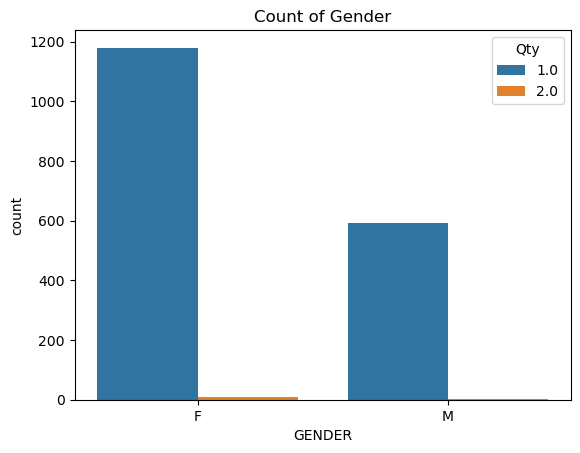

In [35]:
ax=sns.countplot(x='GENDER',data=hyd_dat,hue='Qty')

plt.title('Count of Gender')
plt.plot()

**What are the category of dresses that are brought by Females in the hyderbad**

[]

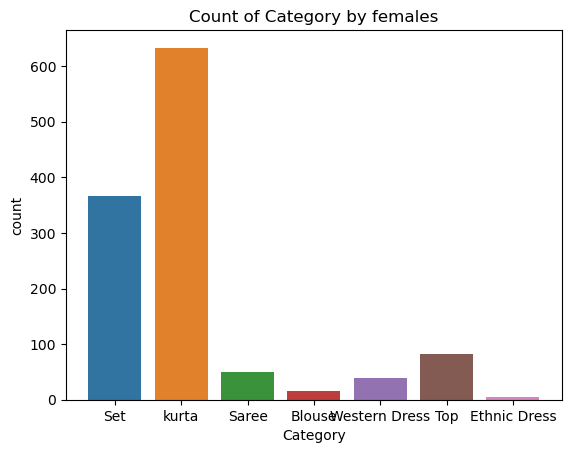

In [36]:
femhyd=hyd_dat[hyd_dat['GENDER']=='F']
ax=sns.countplot(x='Category',data=femhyd)
plt.title('Count of Category by females')
plt.plot()

**What are the categories that men brought more that females in hyderabad?**

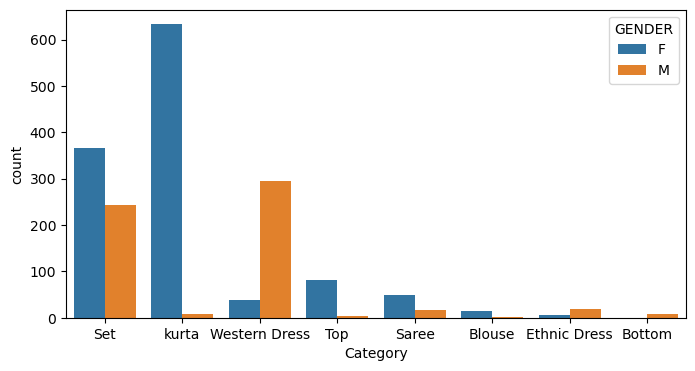

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x='Category',data=hyd_dat,hue='GENDER')
plt.show()

**From which platfrom did most of the hyderabad people used?**

In [38]:
hyd_dat['medium'].value_counts()

Amazon      663
Myntra      405
Flipkart    358
Ajio        117
Meesho       86
Nalli        85
Others       71
Name: medium, dtype: int64

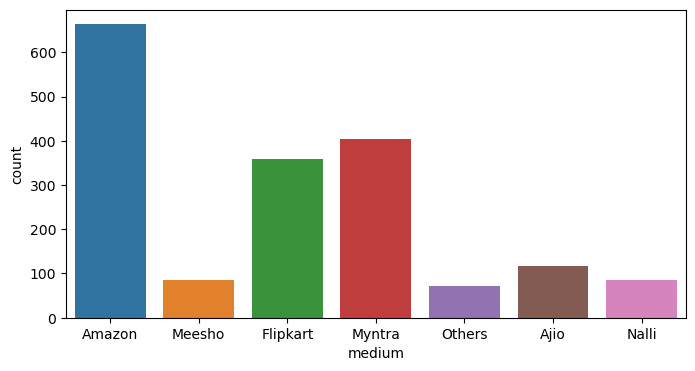

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x='medium',data=hyd_dat)
plt.show()

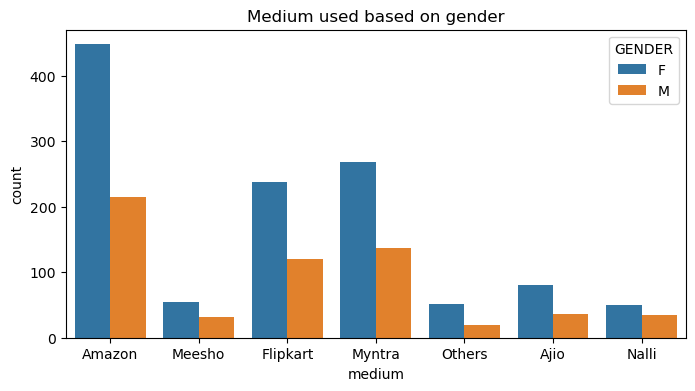

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x='medium',data=hyd_dat,hue='GENDER')
plt.title('Medium used based on gender')
plt.show()

**What is the coorelation between the rows?**

In [41]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Cust ID,Age,Qty,Amount,ship-postal-code,B2B
index,1.000000,0.005095,-0.002517,0.000675,-0.018732,0.007707,0.002976
Cust ID,0.005095,1.000000,0.001214,0.000233,0.000677,0.005850,-0.005771
Age,-0.002517,0.001214,1.000000,0.004884,0.003636,-0.001582,-0.006747
Qty,0.000675,0.000233,0.004884,1.000000,0.172420,0.010492,0.008259
Amount,-0.018732,0.000677,0.003636,0.172420,1.000000,-0.053291,-0.000835
ship-postal-code,0.007707,0.005850,-0.001582,0.010492,-0.053291,1.000000,-0.040744
B2B,0.002976,-0.005771,-0.006747,0.008259,-0.000835,-0.040744,1.000000


In [42]:
df=df.drop("index",axis=1)

In [43]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Cust ID,Age,Qty,Amount,ship-postal-code,B2B
Cust ID,1.000000,0.001214,0.000233,0.000677,0.005850,-0.005771
Age,0.001214,1.000000,0.004884,0.003636,-0.001582,-0.006747
Qty,0.000233,0.004884,1.000000,0.172420,0.010492,0.008259
Amount,0.000677,0.003636,0.172420,1.000000,-0.053291,-0.000835
ship-postal-code,0.005850,-0.001582,0.010492,-0.053291,1.000000,-0.040744
B2B,-0.005771,-0.006747,0.008259,-0.000835,-0.040744,1.000000


/tmp/ipykernel_20/2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


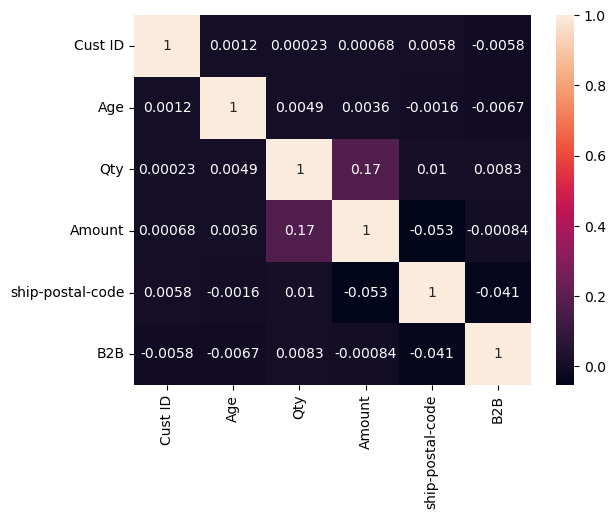

In [44]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**What is the mean of total amount for all the products?**

In [45]:
df.describe()

,Cust ID,Age,Qty,Amount,ship-postal-code
count,3.104700e+04,31047.000000,31047.000000,31047.000000,31047.000000
mean,4.936127e+06,39.496570,1.006120,682.034271,460474.587206
std,2.901019e+06,15.117233,0.094088,268.530854,198116.733009
min,8.950000e+02,18.000000,1.000000,229.000000,110001.000000
25%,2.415610e+06,28.000000,1.000000,486.000000,313001.000000
50%,4.909679e+06,37.000000,1.000000,646.000000,500028.000000
75%,7.453940e+06,47.000000,1.000000,794.000000,600040.000000
max,9.999233e+06,78.000000,5.000000,3036.000000,855117.000000


In [46]:
df.Amount.mean()

682.0342706219602

**Check if any product shipped from visakhapatanam or not?**

In [47]:
df[df['ship-city']=='VISAKHAPATANAM']

,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium


In [48]:
df1=df['ship-state'].value_counts().head()
df1.head()

MAHARASHTRA      4519
KARNATAKA        3988
UTTAR PRADESH    2882
TAMIL NADU       2679
TELANGANA        2527
Name: ship-state, dtype: int64

In [49]:
state=df.groupby('ship-state')
state.head()

,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
0,171-1029312-3038738,11234,F,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1.0,INR,376.0,MOHALI,PUNJAB,140301,IN,False,Myntra
1,405-2183842-2225946,23244,F,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1.0,INR,1449.0,GURUGRAM,HARYANA,122002,IN,False,Ajio
2,171-1641533-8921966,21343,F,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1.0,INR,453.0,KOLKATA,WEST BENGAL,700029,IN,False,Myntra
3,404-7490807-6300351,454564,F,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1.0,INR,682.0,THANJAVUR,TAMIL NADU,613007,IN,False,Amazon
4,403-9293516-4577154,454333,F,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1.0,INR,544.0,GURUGRAM,HARYANA,122001,IN,False,Myntra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24702,404-5223942-0341154,5223942,M,49,2022-08-06,Delivered,Amazon,JNE3797-KR-L,Western Dress,L,1.0,INR,735.0,Rangpo,Sikkim,737132,IN,False,Amazon
25058,408-2391264-1885908,2391264,F,36,2022-08-06,Delivered,Amazon,JNE3567-KR-XS,kurta,XS,1.0,INR,399.0,south goa,goa,403716,IN,False,Amazon
25627,402-2262572-0675559,2262572,M,25,2022-07-06,Delivered,Amazon,SET240-KR-PP-M,Set,M,1.0,INR,579.0,Raia,Goa,403720,IN,False,Amazon
26398,404-5459392-9902753,5459392,F,69,2022-06-06,Delivered,Amazon,JNE3721-KR-XXL,kurta,XXL,1.0,INR,301.0,Naharlugun model arunachal pradesh,Arunachal pradesh,791110,IN,False,Amazon


In [50]:
maha=state.get_group('MAHARASHTRA')
maha.head()

,ORDERID,Cust ID,GENDER,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,medium
5,407-1298130-0368305,343535,M,49,2022-12-04,Delivered,Flipkart,JNE3797-KR-XXL,Western Dress,XXL,1.0,INR,735.0,SANGLI MIRAJ KUPWAD,MAHARASHTRA,416436,IN,False,Flipkart
18,171-8974687-6745940,8974687,M,24,2022-12-04,Delivered,Myntra,J0161-DR-XXL,Western Dress,XXL,1.0,INR,473.0,MUMBAI,MAHARASHTRA,400097,IN,False,Myntra
41,402-0637532-2672317,637532,F,39,2022-12-04,Delivered,Amazon,J0334-TP-S,Top,S,1.0,INR,545.0,PUNE,MAHARASHTRA,411051,IN,False,Amazon
42,404-3393819-5081930,3393819,F,44,2022-12-04,Delivered,Myntra,SET397-KR-NP-XS,Set,XS,1.0,INR,1115.0,PUNE,MAHARASHTRA,412207,IN,False,Myntra
47,406-8068610-1108329,8068610,F,48,2022-12-04,Delivered,Nalli,JNE3770-KR-S,kurta,S,1.0,INR,487.0,PUNE,MAHARASHTRA,411014,IN,False,Nalli


**What is the mean amount spent by Mahrasatra people?**

In [51]:
maha.Amount.mean()

661.6997123257357

In [52]:
maha.Status

5        Delivered
18       Delivered
41       Delivered
42       Delivered
47       Delivered
           ...    
31018    Delivered
31021    Delivered
31029    Delivered
31042    Delivered
31045    Delivered
Name: Status, Length: 4519, dtype: object

In [53]:
maha.Status.value_counts()

Delivered    4148
Returned      145
Cancelled     136
Refunded       90
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x77fbc4294c10>,
 [Text(-2.127230911602348, 0.5611493996463373, 'Delivered'),
  Text(2.0132271761759744, -0.8870830497233686, 'Returned'),
  Text(2.244723538431031, -0.5012147603709142, 'Cancelled'),
  Text(2.2954995301538297, -0.14381205465310073, 'Refunded')])

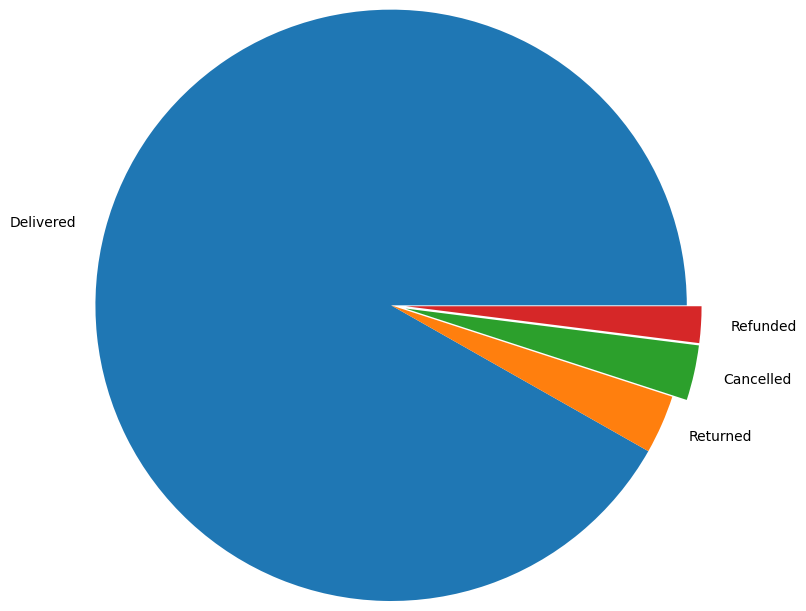

In [54]:
label=['Delivered','Returned','Cancelled','Refunded']
plt.pie(maha.Status.value_counts(),labels=label,radius=2,explode=[0,0,0.1,0.1])

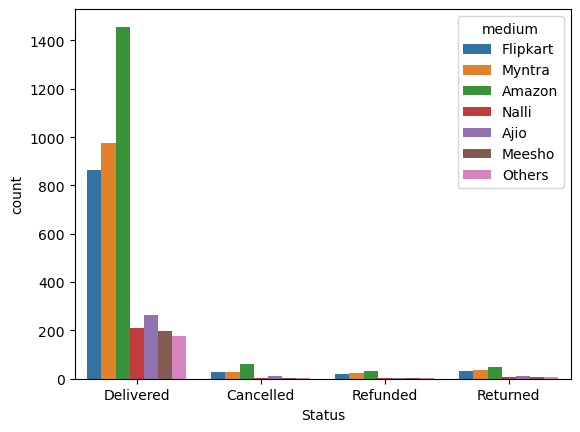

In [55]:
sns.countplot(x='Status',data=maha,hue='medium')
plt.show()

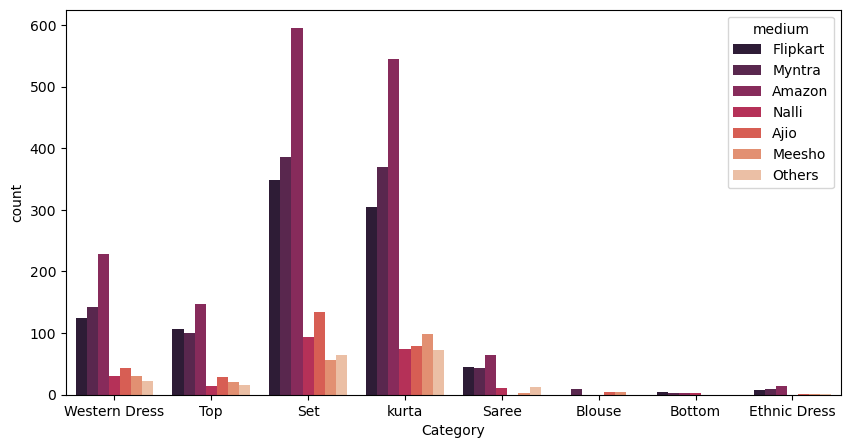

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=maha,hue='medium',palette='rocket')
plt.show()

**From which district in Maharastra did most of the products shipped from?**

In [57]:
maha['ship-city'].value_counts().head()

MUMBAI         1224
PUNE            726
THANE           307
NAVI MUMBAI     290
Mumbai          153
Name: ship-city, dtype: int64

**What is the mean amount shipped by amazon in Maharastra?**

In [58]:
maha[maha['medium']=='Amazon'].Amount.mean()

665.8685857321652

**By which medium did most of the people spent their amount in Maharastra?**

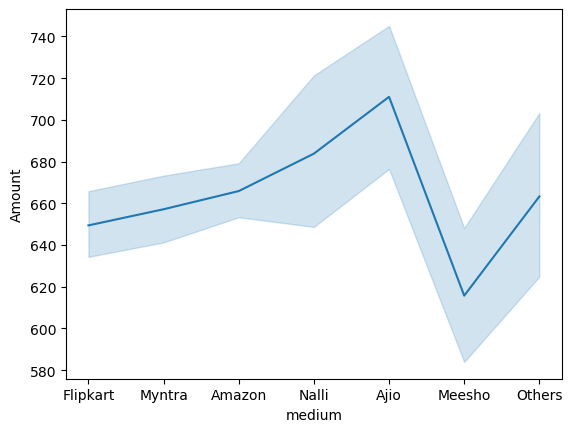

In [59]:
sns.lineplot(x='medium',y='Amount',data=maha)
plt.show()

**what is the Average amount spent by the gender via medium in maharastara?**

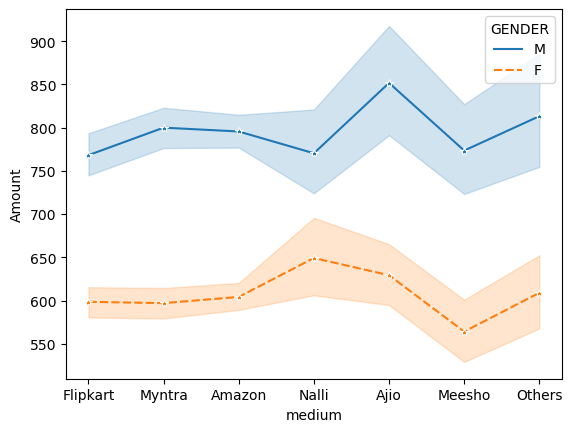

In [60]:
sns.lineplot(x='medium',y='Amount',data=maha,hue='GENDER',marker='*',style='GENDER')
plt.show()

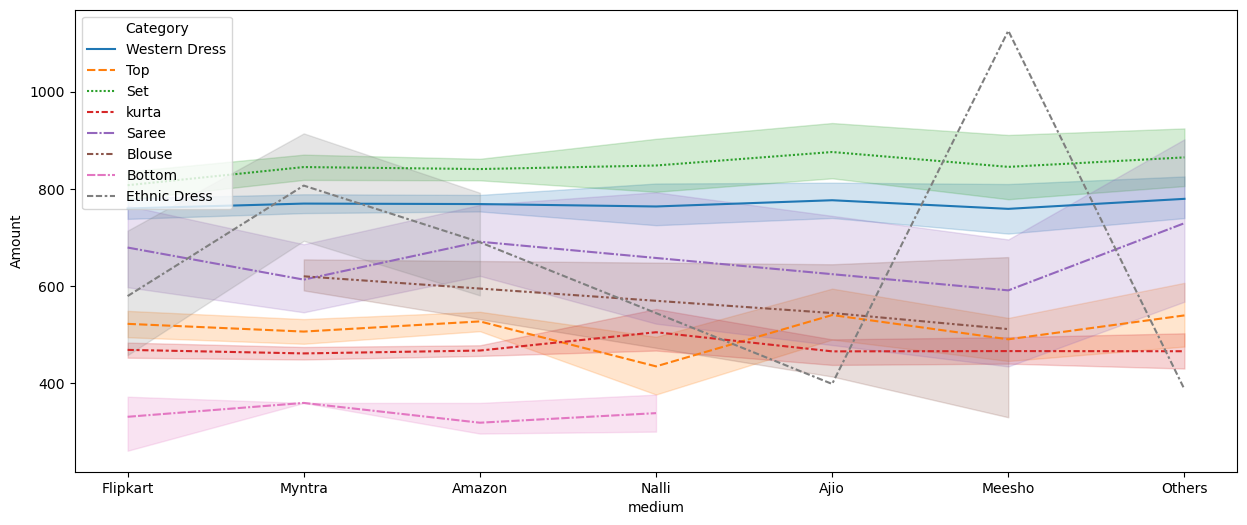

In [61]:
plt.figure(figsize=(15,6))
sns.lineplot(x='medium',y='Amount',data=maha,hue='Category',style='Category',estimator='mean')
plt.show()

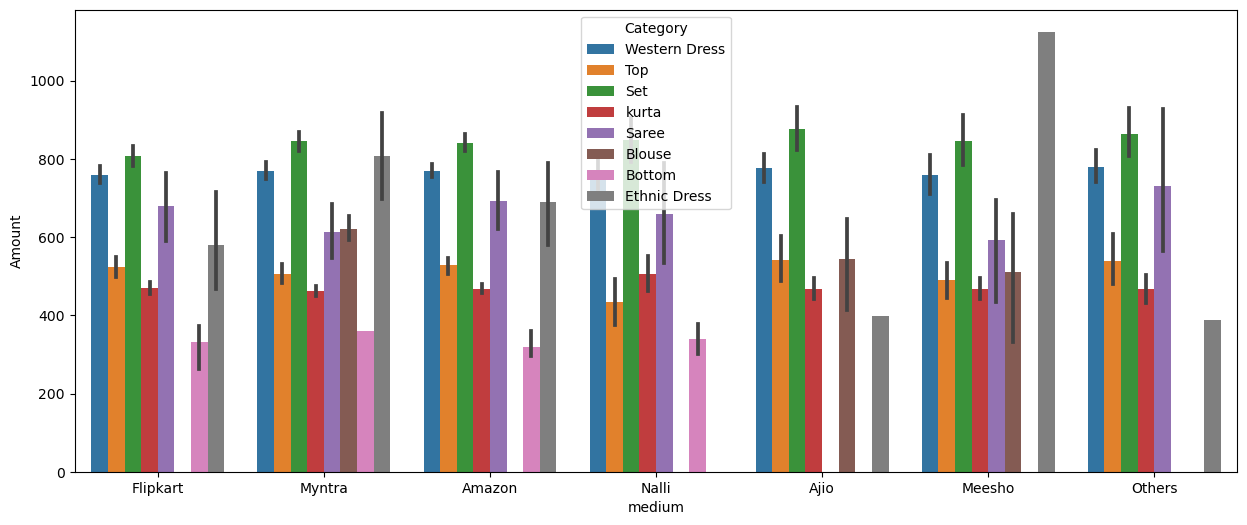

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(x='medium',y='Amount',data=maha,hue='Category',estimator='mean')
plt.show()

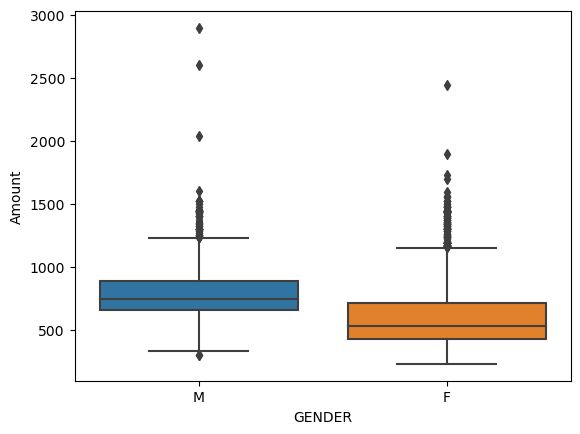

In [63]:
sns.boxplot(x='GENDER',y='Amount',data=maha)
plt.show()

**Removing all the outliers from the graph above**

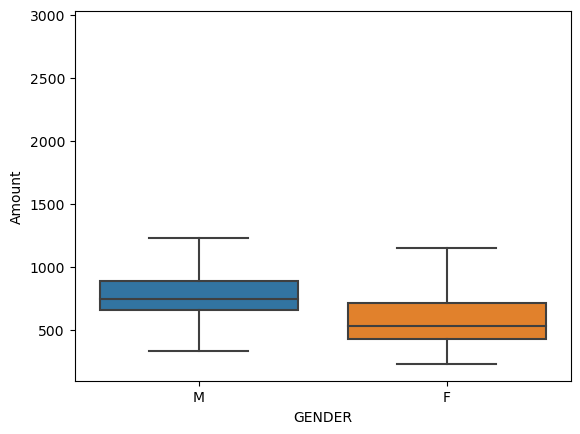

In [64]:
sns.boxplot(x='GENDER',y='Amount',data=maha,fliersize=0)
plt.show()

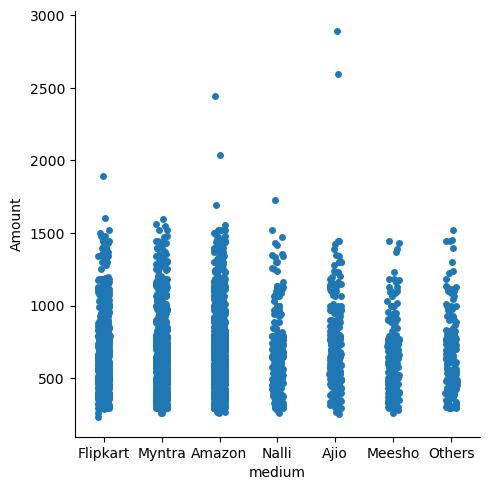

In [65]:
sns.catplot(x='medium',y='Amount',data=maha)
plt.show()

**Classification based on the gender**

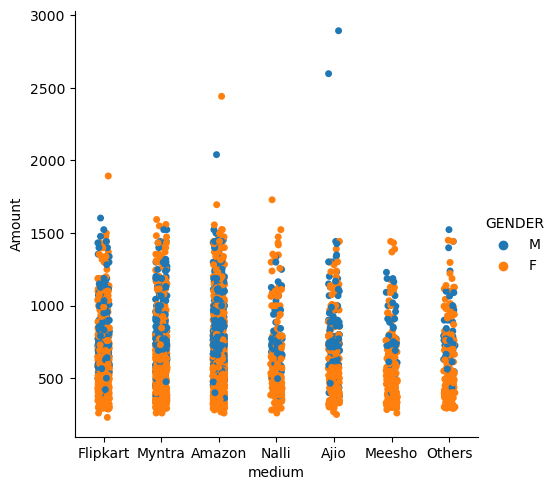

In [66]:
sns.catplot(x='medium',y='Amount',data=maha,hue='GENDER')
plt.show()

In [67]:
Q1 = np.percentile(maha['Amount'], 25, method='midpoint')
Q3 = np.percentile(maha['Amount'], 75, method='midpoint')
IQR = Q3 - Q1
IQR

306.0

**Detecting the outliers in the graph**

In [68]:
upper=Q3+1.5*IQR
upper_array=np.array(maha['Amount']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(maha['Amount']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 1234.0
174
Lower Bound: 10.0
0


**After removing the outliers**

In [69]:
np.where((maha['Amount'] > 10) & (maha['Amount'] < 1234))

(array([   0,    1,    2, ..., 4516, 4517, 4518]),)

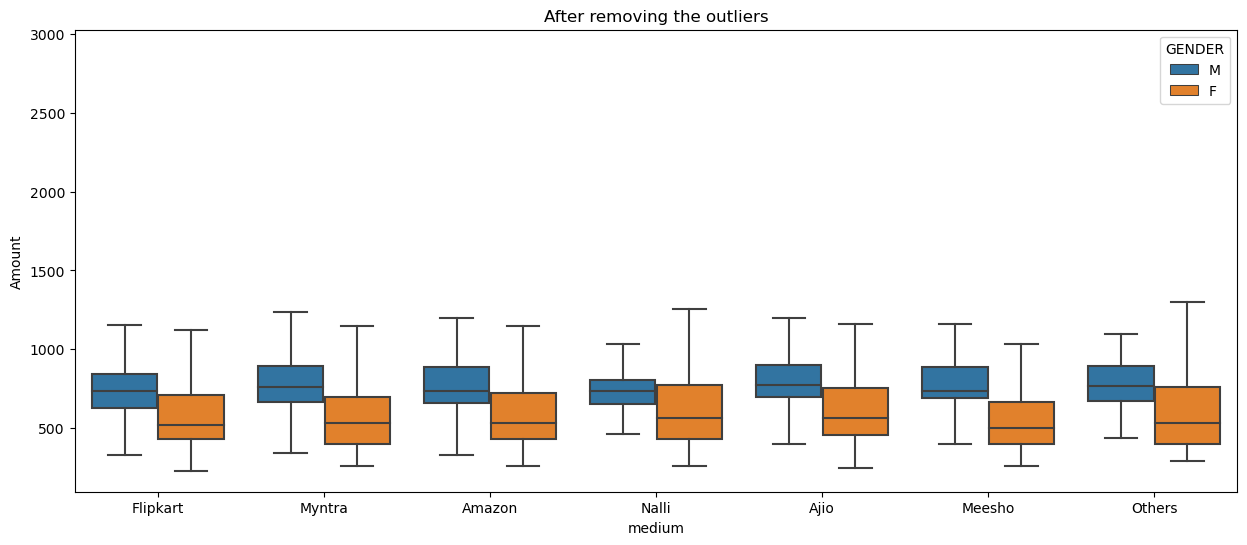

In [70]:
plt.figure(figsize=(15,6))
sns.boxplot(x='medium',y='Amount',data=maha,hue='GENDER',fliersize=0)
plt.title('After removing the outliers')
plt.show()

**The corelation and covariance among the Maharasatra Data**

In [71]:
maha.cov()

/tmp/ipykernel_20/3756359357.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maha.cov()


,Cust ID,Age,Qty,Amount,ship-postal-code,B2B
Cust ID,8.320644e+12,-158967.838623,532.976522,4.897774e+06,-2.180835e+08,-1996.833411
Age,-1.589678e+05,231.734763,0.011605,-1.724465e+01,-5.015767e+03,-0.005787
Qty,5.329765e+02,0.011605,0.004194,2.552126e+00,-1.463277e+01,-0.000024
Amount,4.897774e+06,-17.244653,2.552126,6.947313e+04,1.143493e+05,0.085128
ship-postal-code,-2.180835e+08,-5015.767367,-14.632774,1.143493e+05,1.424837e+08,-29.702213
B2B,-1.996833e+03,-0.005787,-0.000024,8.512820e-02,-2.970221e+01,0.007033


In [72]:
maha.corr()

/tmp/ipykernel_20/3608292322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maha.corr()


,Cust ID,Age,Qty,Amount,ship-postal-code,B2B
Cust ID,1.000000,-0.003620,0.002853,0.006442,-0.006334,-0.008255
Age,-0.003620,1.000000,0.011771,-0.004298,-0.027603,-0.004533
Qty,0.002853,0.011771,1.000000,0.149506,-0.018928,-0.004329
Amount,0.006442,-0.004298,0.149506,1.000000,0.036345,0.003851
ship-postal-code,-0.006334,-0.027603,-0.018928,0.036345,1.000000,-0.029672
B2B,-0.008255,-0.004533,-0.004329,0.003851,-0.029672,1.000000


/tmp/ipykernel_20/1162762622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(maha.corr())


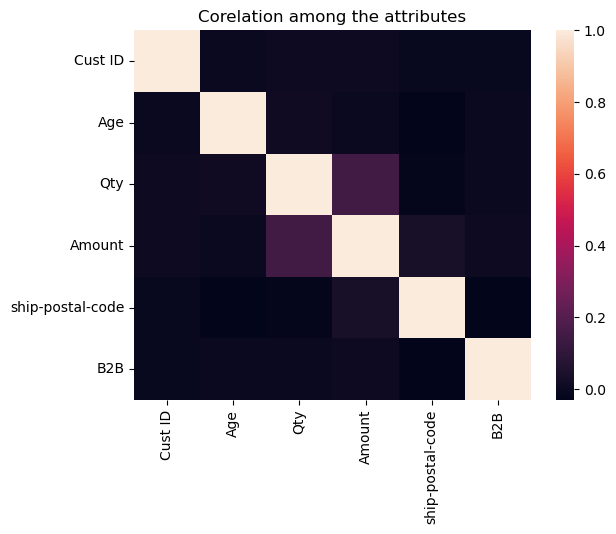

In [73]:
sns.heatmap(maha.corr())
plt.title("Corelation among the attributes")
plt.show()

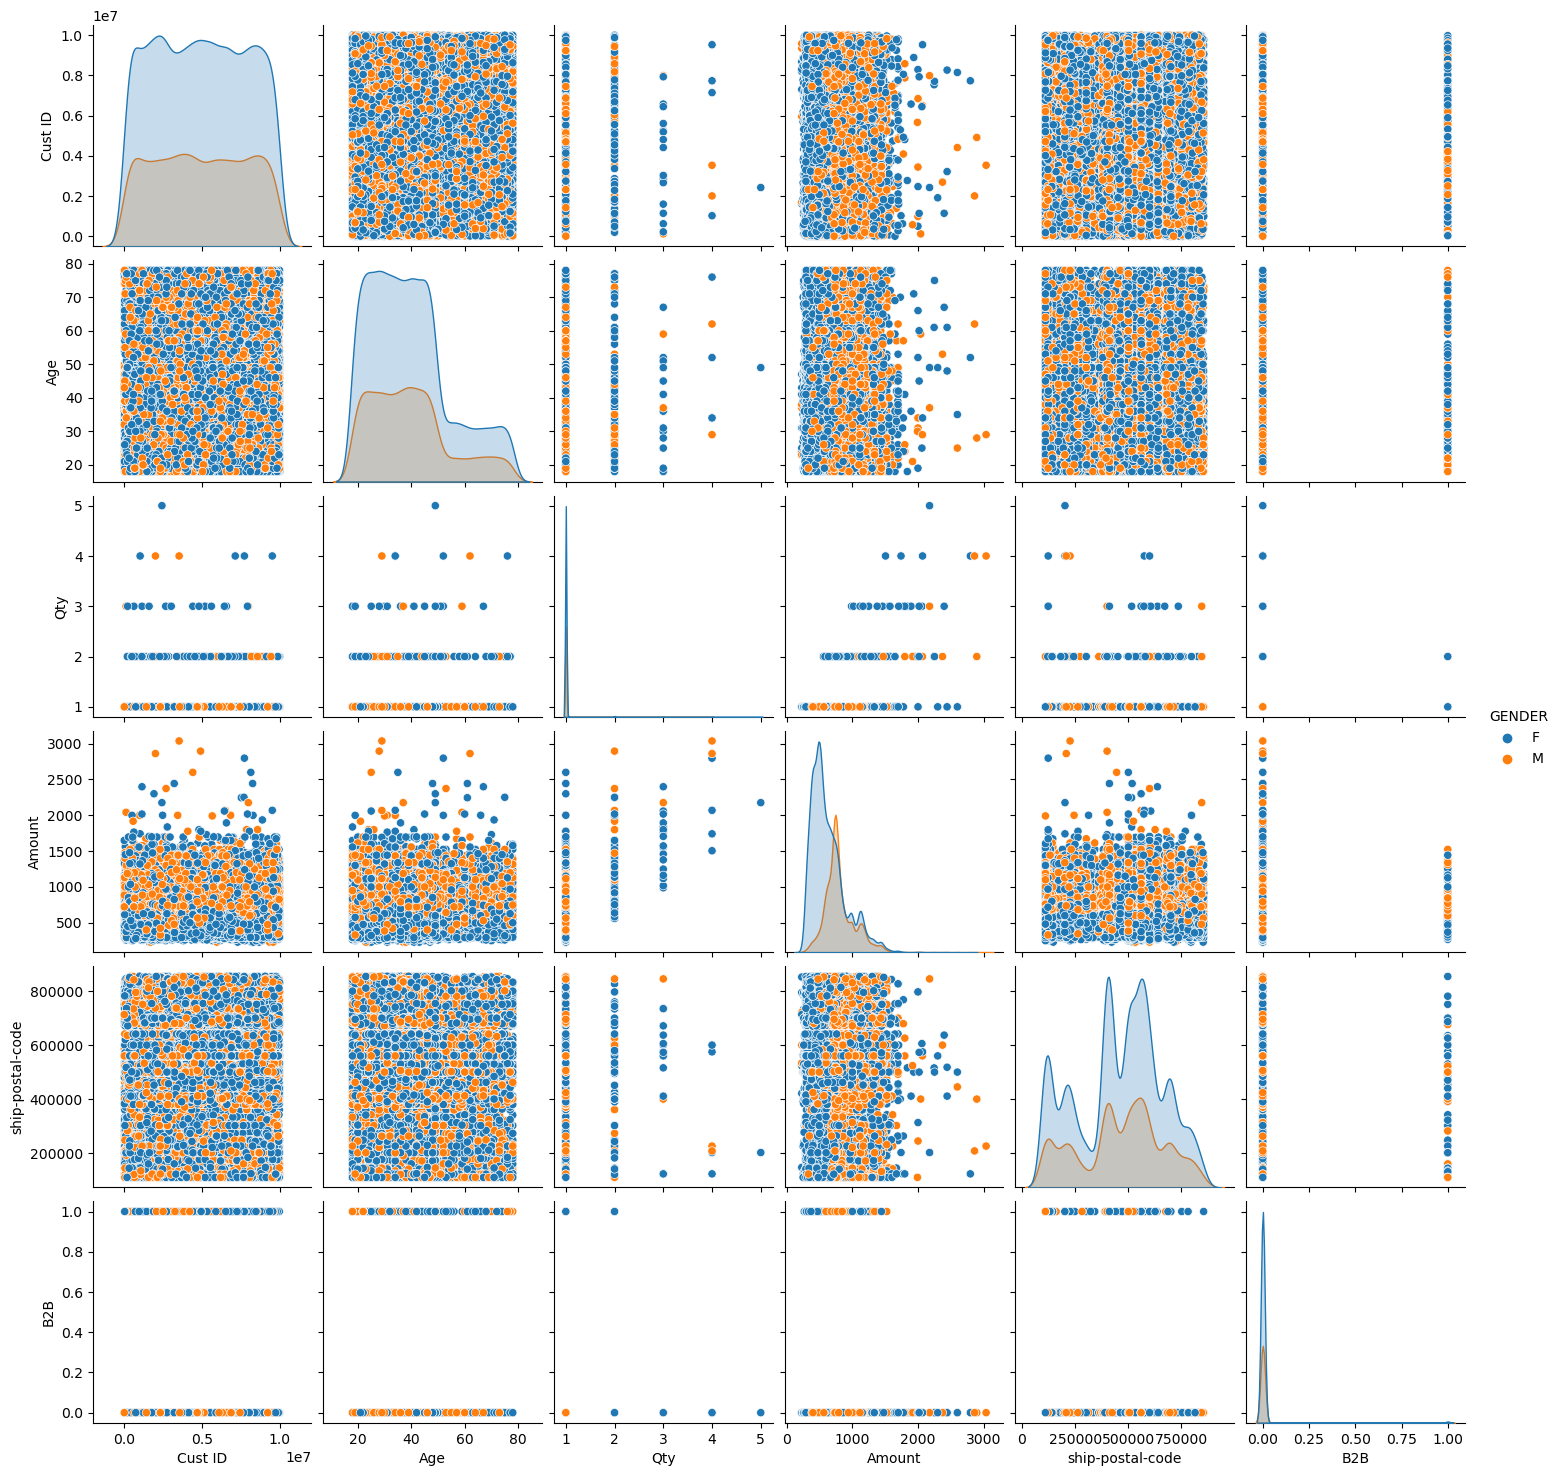

In [74]:
sns.pairplot(df,hue='GENDER')
plt.show()